<a href="https://colab.research.google.com/github/babakkeshavarz/time_series/blob/main/SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2023-06-19 23:36:04--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  5.99MB/s    in 0.7s    

2023-06-19 23:36:05 (5.99 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sp500_close.csv', index_col = 0 , parse_dates = True)

In [5]:
print(list(df))

['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP', 'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY', 'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA', 'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'C', 'DAL', 'DE', 'DFS', 'DGX', 'DG', 'DHI', 'DHR', 'DISCA', 'DISCK', 'DI

In [15]:
goog = df[['GOOG']].copy().dropna()

<Axes: >

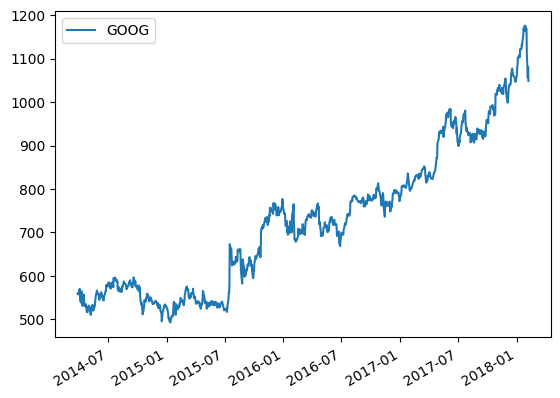

In [16]:
goog.plot()

In [17]:
goog_ret = np.log(goog.pct_change(1) + 1)

<Axes: >

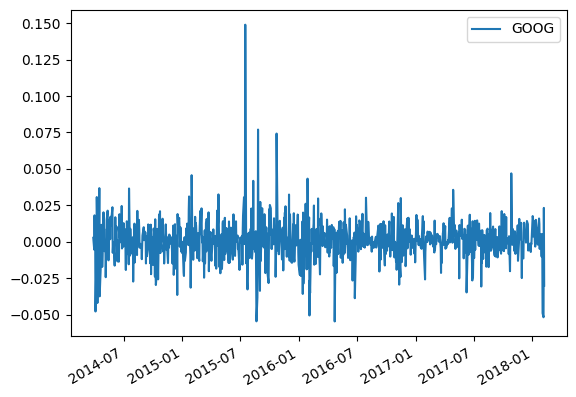

In [18]:
goog_ret.plot()

In [19]:
# print(list(goog))
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()

<Axes: >

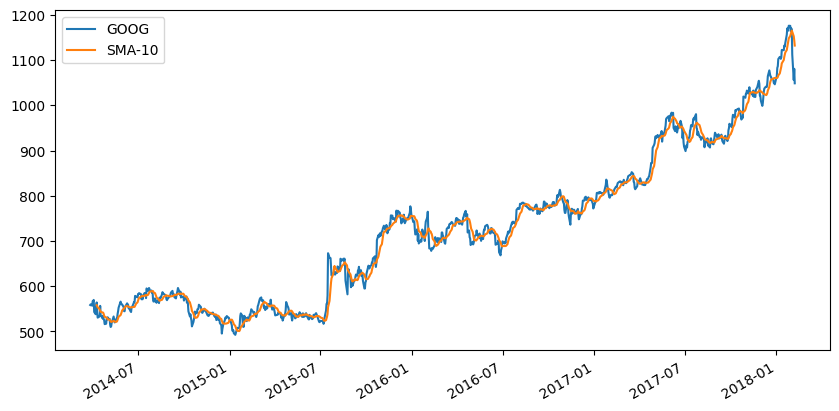

In [22]:
goog.plot(figsize=(10,5))

In [31]:
goog_aapl = df[['GOOG' , 'AAPL']].copy().dropna()
cov_goog_apply = goog_aapl.rolling(50).cov()
cov_goog_apply

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [32]:
cov_goog_apply.loc['2018-02-06'].to_numpy()

array([[2691.75646465,   38.17446816],
       [  38.17446816,   19.12137143]])

In [33]:
goog_aapl_ret = np.log(1+goog_aapl.pct_change(1))

In [36]:
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

<Axes: >

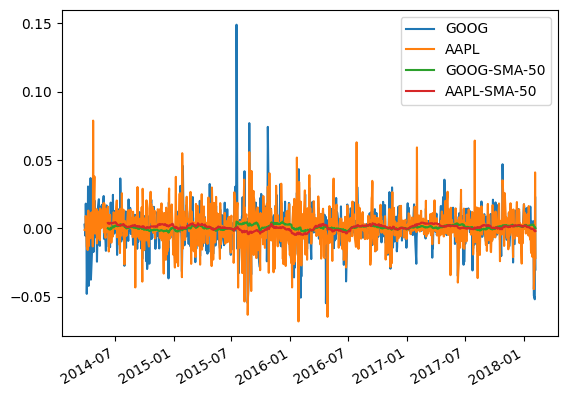

In [37]:
goog_aapl_ret.plot()

In [44]:
cov_df = goog_aapl_ret[['GOOG-SMA-50' , 'AAPL-SMA-50']].rolling(50).cov()
cov_df.tail()

GOOG-SMA-50   AAPL-SMA-50
2018-02-05 AAPL-SMA-50 -7.715772e-08  1.188405e-06
2018-02-06 GOOG-SMA-50  2.852362e-07 -1.882949e-08
           AAPL-SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG-SMA-50  3.430702e-07  8.238184e-08
           AAPL-SMA-50  8.238184e-08  1.506869e-06

In [45]:
corr_df = goog_aapl_ret[['GOOG-SMA-50' , 'AAPL-SMA-50']].rolling(50).corr()
corr_df.tail()

GOOG-SMA-50  AAPL-SMA-50
2018-02-05 AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000

<Axes: >

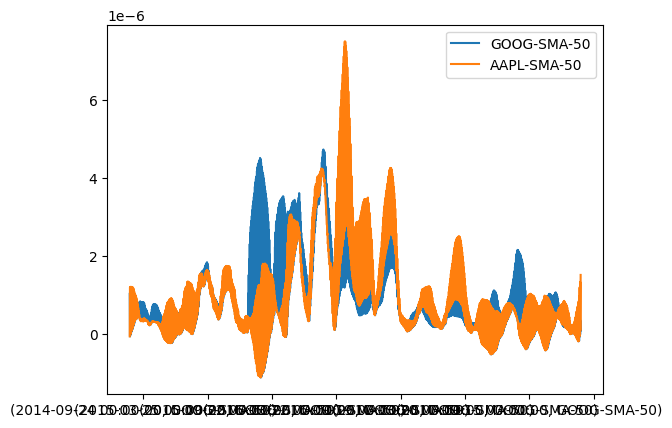

In [47]:
cov_df.plot()